In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load dataset
# Make sure you are in the main folder('..\Algal-bloom-prediction-machine-learning')
cd = os.getcwd()
if cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
    
os.chdir('Trainning data')

In [3]:
lakename = input('Lake name in short:')
winter = input('Winter data or not? (Y/N)')
if winter =='Y':
    all_df = pd.read_csv(lakename+'_Observation_df.csv',sep = '\t',parse_dates = ['Date'])
else:
    all_df = pd.read_csv(lakename+'_Observation_df_nowinter.csv',sep = '\t',parse_dates = ['Date'])

Lake name in short:Ekoln
Winter data or not? (Y/N)N


Index(['Date', 'thermD', 'MLD', 'SW', 'AirT', 'Prec(mm)', 'relhum', 'Wdir',
       'Wspeed(m/s)', 'CC', 'Inflow', 'W', 'delT', 'Ice_d', 'day_from_iceoff',
       'MM', 'NH4-N', 'NOX', 'O2', 'Tot-P', 'PO4-P', 'Si', 'Water temp',
       'Chl'],
      dtype='object')
Number of variables: 1
The variable to visualize: Chl


<AxesSubplot:xlabel='Date'>

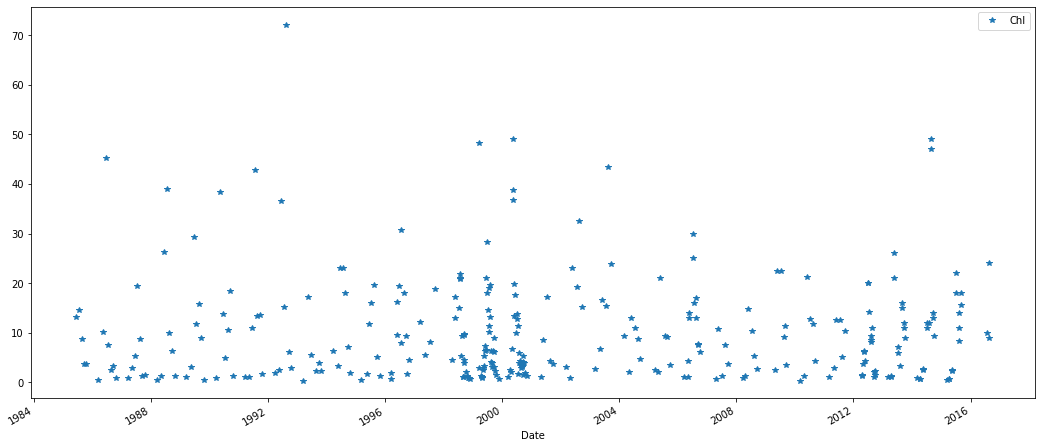

In [4]:
print(all_df.columns)
n_var=int(input('Number of variables: '))
variable=[]
for i in range(n_var):
    v=input('The variable to visualize: ')
    variable.append(v)
all_df.plot(x = 'Date',y = variable,style='*',figsize=(18,8))